<a href="https://colab.research.google.com/github/disney-snoopy/SmArtGenerative/blob/model_class/model_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LBFGS MODEL

In [1]:
#Adding new search path
!pip install git+https://github.com/disney-snoopy/toolbox

  Cloning https://github.com/disney-snoopy/toolbox to /tmp/pip-req-build-9pjvqjws
  Running command git clone -q https://github.com/disney-snoopy/toolbox /tmp/pip-req-build-9pjvqjws
  Created wheel for toolbox: filename=toolbox-1.0-cp37-none-any.whl size=8306 sha256=83b896c7c5fee469e9563e97690e92cfcaea5a60c7922a5be1212975a6543d68
  Stored in directory: /tmp/pip-ephem-wheel-cache-90ommspp/wheels/e0/e4/05/527fad3be42b4717820cf433a43a42d0fbdc7b4cee2cf8b4a7
Successfully built toolbox


In [2]:
#!pip uninstall toolbox

In [3]:
#Basic libraries
import matplotlib.pyplot as plt
import numpy as np
import copy

#torch libraries
import torch
from torchvision import models
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision.transforms.functional import *
import torchvision.transforms as transforms


#custom package
from toolbox.utils import *
from toolbox.nn_transfer import *
from toolbox.lbfgs_transfer import *

## Resize to save computational time during testing

You can either use `image_loader` or `resize_loader` when loading an image from path.

`Image_loader` keeps the original shape and `resize_loader` crops the image into given shape.

If you want to save computational time during testing, you can use `resize_loader`

In [4]:
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

resize_transform = transforms.Compose([
                            transforms.Resize(imsize),  # scale imported image
                            transforms.CenterCrop(imsize),
                            transforms.ToTensor()])  # transform it into a torch tensor

def resize_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = resize_transform(image).unsqueeze(0)
    return image.to(device, torch.float)

Note the shape difference.

In [5]:
path_style = '/content/drive/MyDrive/Lewagon/project/style_transfer/img/monet (2).jpg'
#Define input images
style_resize_img = resize_loader(path_style)
style_img = image_loader(path_style)
print('resize shape: ', style_resize_img.shape)
print('original shape: ', style_img.shape)

resize shape:  torch.Size([1, 3, 512, 512])
original shape:  torch.Size([1, 3, 1001, 1031])


# Weight Finder
Tuning parameters:
- num_steps: number of epochs
- begin, end: style weight range in exponential format

ex) begin =2, end = 5 will test style weights in $[1e2, 1e3, 1e4, 1e5]$

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/toolbox/lbfgs_transfer.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/usr/local/lib/python3.7/dist-packages/toolbox/lbfgs_transfer.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..
Building the style transfer model..
Optimizing..


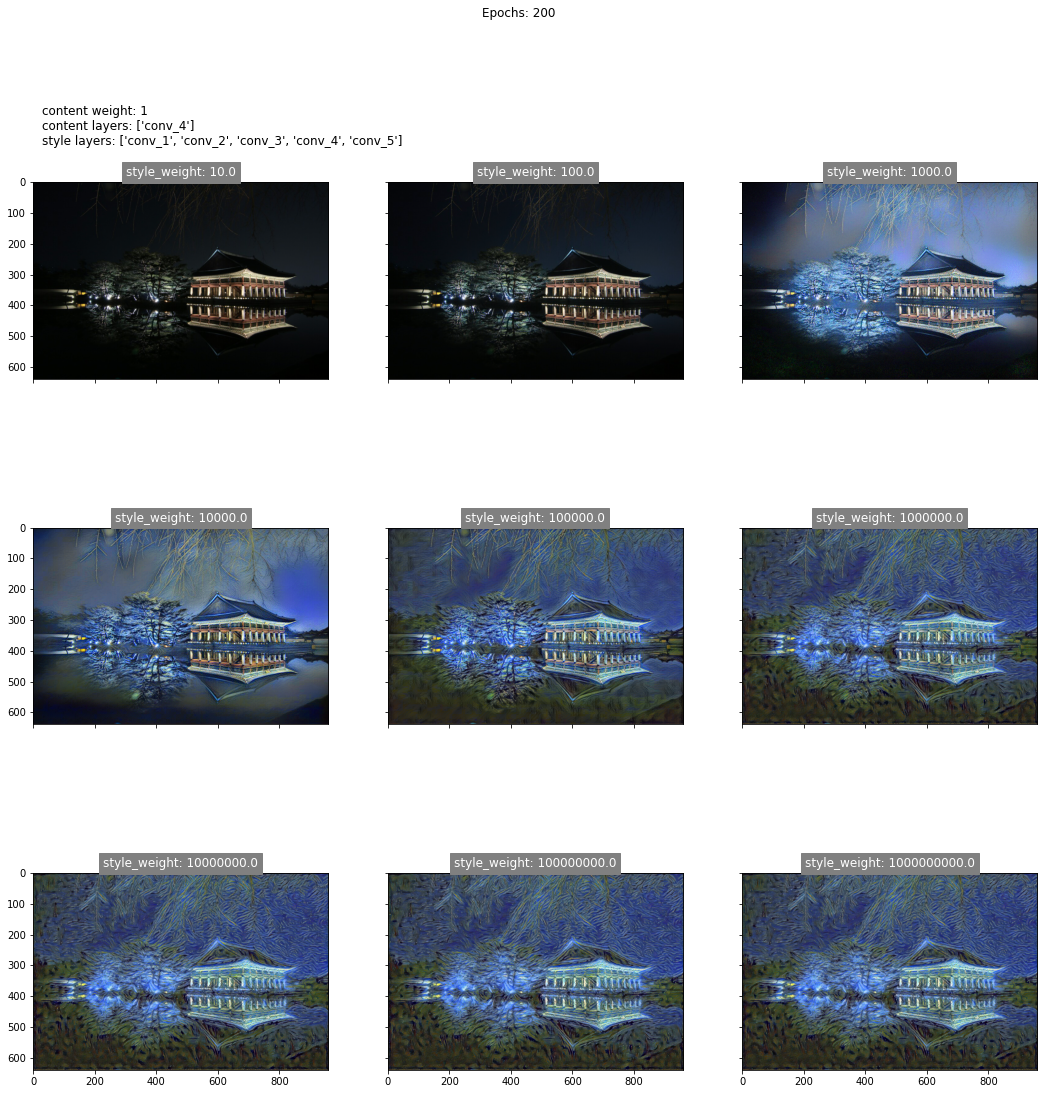

In [6]:
path_style = '/content/drive/MyDrive/Lewagon/project/style_transfer/img/starry_night.jpg'
path_content = '/content/drive/MyDrive/Lewagon/project/style_transfer/img/kungbok.jpg'
#Define input images
style_img = image_loader(path_style)
content_img = image_loader(path_content)
input_img = content_img.clone()

LBFGS_Transfer = lbfgs_Transfer()
LBFGS_Transfer.search_weight(begin = 1, end=9, 
                             content_img=content_img, style_img=style_img, input_img=content_img, 
                             num_steps=200)

Access the list of output images using `LBFGS_Transfer.output_imgs`

In [7]:
# you can access each outcome tensors within class
print(len(LBFGS_Transfer.output_imgs))

9


Style weight:  100000.0


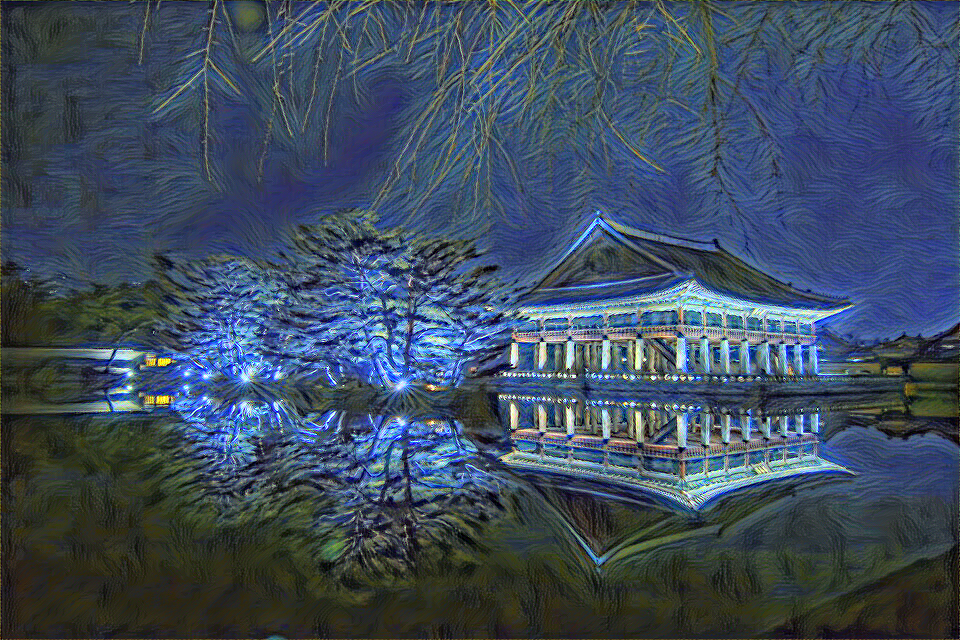

In [9]:
img_index = 4
print('Style weight: ',LBFGS_Transfer.style_weights[img_index])
unloader(LBFGS_Transfer.output_imgs[img_index][0])

## Epoch Finder

Tuning params:
- epochs = maximum number of epochs
- output_freq = Save interval between epochs
- style_weight
- content_weight (default = 1)

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/toolbox/lbfgs_transfer.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/usr/local/lib/python3.7/dist-packages/toolbox/lbfgs_transfer.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 195.469299 Content Loss: 20.612053
run [100]:
Style Loss : 23.928265 Content Loss: 22.364616


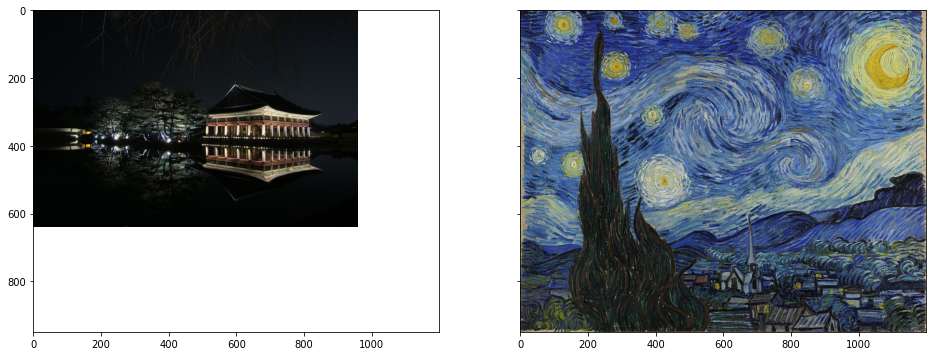

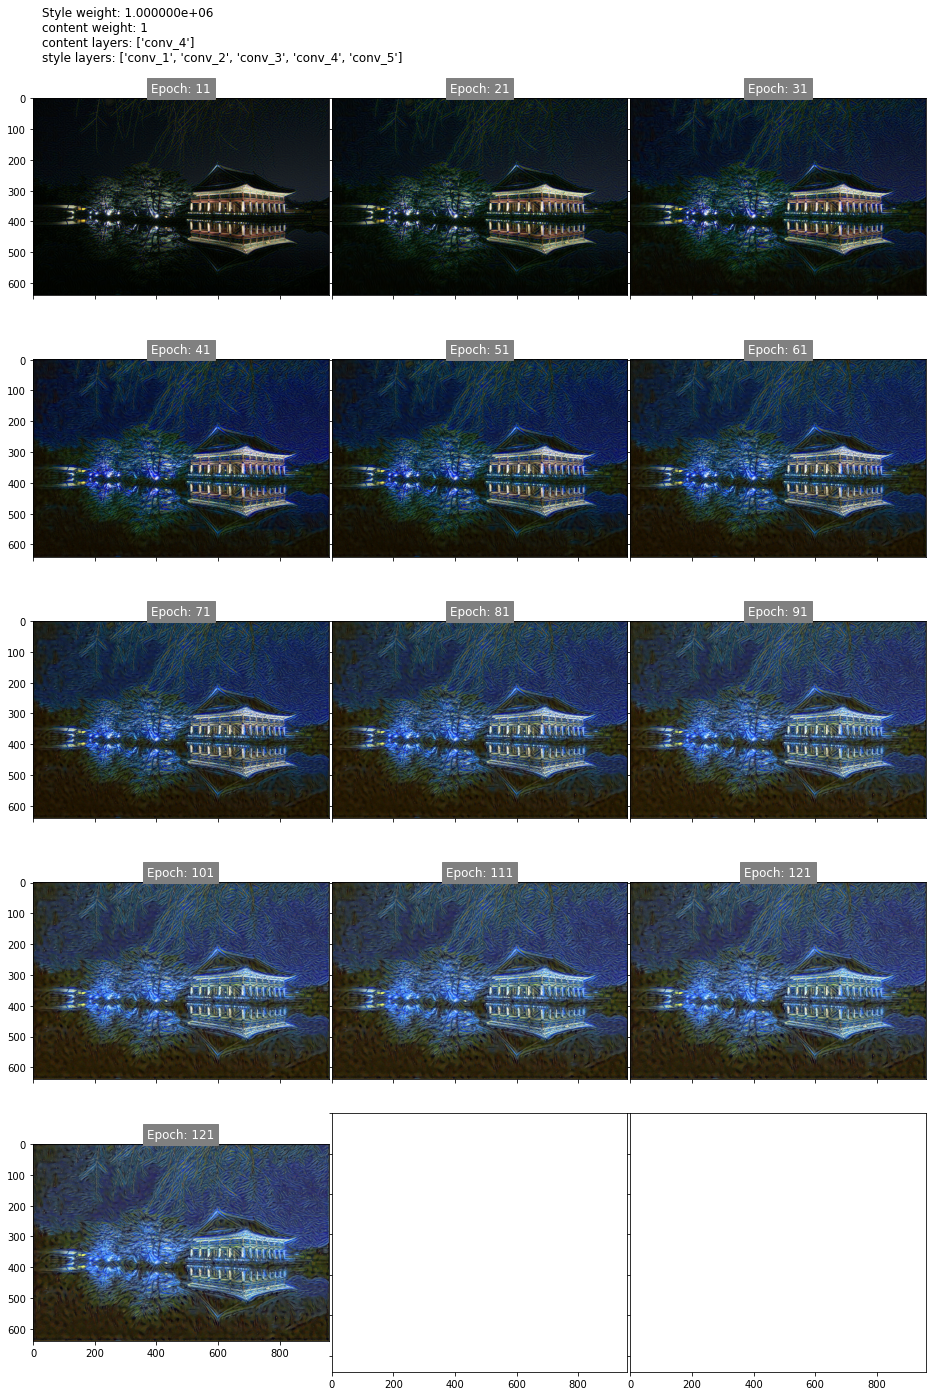

In [10]:
path_style = '/content/drive/MyDrive/Lewagon/project/style_transfer/img/starry_night.jpg'
path_content = '/content/drive/MyDrive/Lewagon/project/style_transfer/img/kungbok.jpg'
#Define input images
style_img = image_loader(path_style)
content_img = image_loader(path_content)
input_img = content_img.clone()

LBFGS_Transfer = lbfgs_Transfer()
LBFGS_Transfer.learn(content_img=content_img, style_img=style_img, input_img=input_img, style_weight=1e6, epochs=100, output_freq=10)
LBFGS_Transfer.plot_output()

Access the list of output images using `LBFGS_Transfer.output_imgs`

In [11]:
# you can access each outcome tensors within class
print(len(LBFGS_Transfer.output_imgs))

13


Epoch number:  110


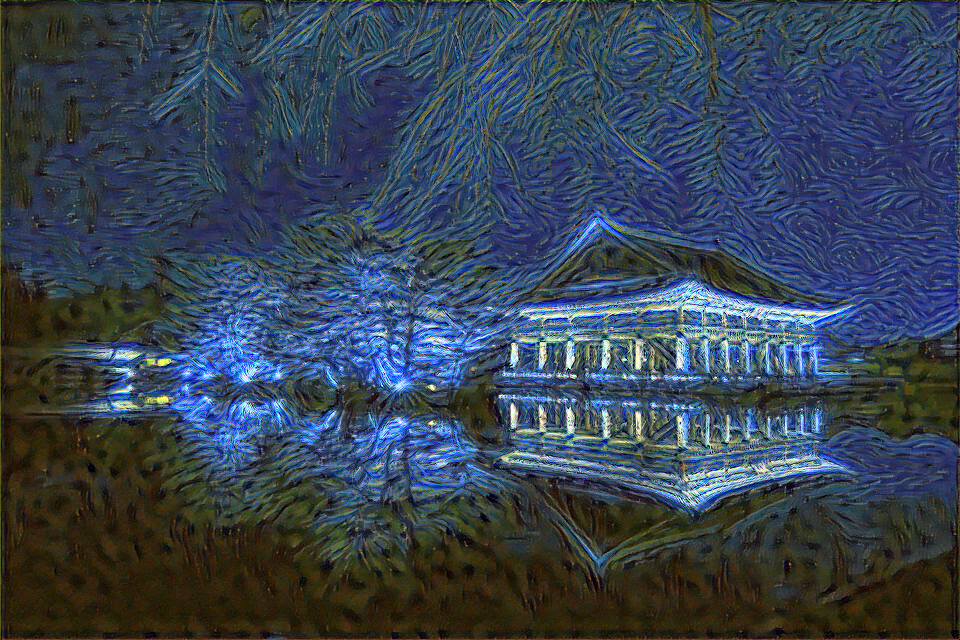

In [17]:
img_index =10
print('Epoch number: ',LBFGS_Transfer.epoch_nums[img_index])
unloader(LBFGS_Transfer.output_imgs[img_index][0])